In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier , NeighborhoodComponentsAnalysis , KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest , chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data.csv')
data.head(n=10)

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7
5,0.02,10,40,honeycomb,200,60,40,pla,0,60,24,1.1
6,0.02,5,10,grid,205,65,40,pla,25,55,12,1.3
7,0.02,10,10,honeycomb,210,70,40,pla,50,21,14,1.5
8,0.02,9,70,grid,215,75,40,pla,75,24,27,1.4
9,0.02,8,40,honeycomb,220,80,40,pla,100,30,25,1.7


In [3]:
data['elongation'] = data['elongation']*100
data['layer_height'] = data['layer_height']*100

In [4]:
le = preprocessing.LabelEncoder()
data['infill_pattern'] = le.fit_transform(data['infill_pattern'])
data.head(n=10)

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,2.0,8,90,0,220,60,40,abs,0,25,18,120.0
1,2.0,7,90,1,225,65,40,abs,25,32,16,140.0
2,2.0,1,80,0,230,70,40,abs,50,40,8,80.0
3,2.0,4,70,1,240,75,40,abs,75,68,10,50.0
4,2.0,6,90,0,250,80,40,abs,100,92,5,70.0
5,2.0,10,40,1,200,60,40,pla,0,60,24,110.0
6,2.0,5,10,0,205,65,40,pla,25,55,12,130.0
7,2.0,10,10,1,210,70,40,pla,50,21,14,150.0
8,2.0,9,70,0,215,75,40,pla,75,24,27,140.0
9,2.0,8,40,1,220,80,40,pla,100,30,25,170.0


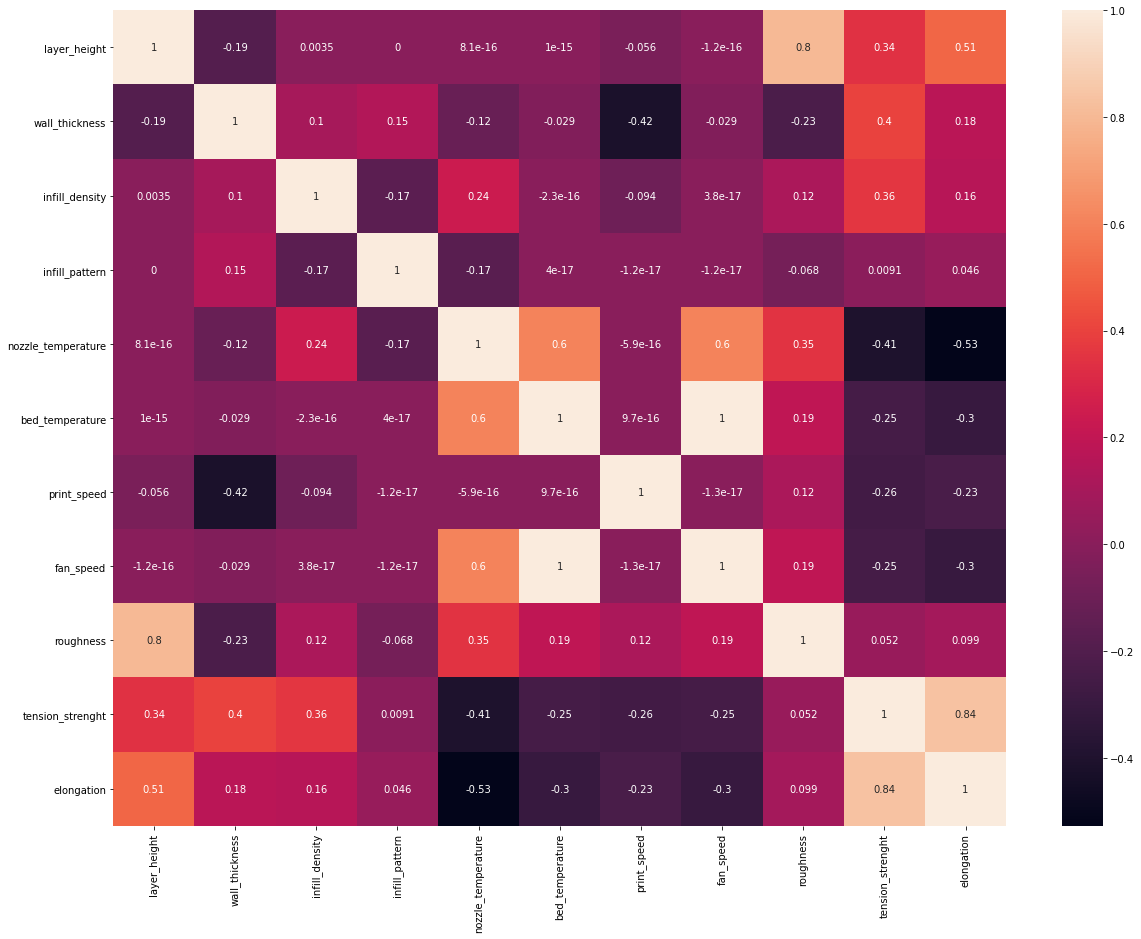

In [5]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)
plt.show()